On the madelon dataset, train decision trees of maximum depth 1, 2, .... up to
12, for a total of 12 decision trees. If your package does not allow the max depth
as a parameter, train trees with 21, 22, ..., 212 nodes, again a total of 12 trees. Use
the trained trees to predict the class labels on the training and test sets, and obtain
the training and test misclassification errors. Plot on the same graph the training
and test misclassification errors vs tree depth (or log2 of nodes) as two separate
curves. Report in a table the minimum test error and the tree depth (number of
nodes or splits) for which the minimum was attained. (2 points)
b) Repeat point a) on the satimage dataset. (2 points)

In [51]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [52]:
file_loc = "/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw1/data/satimage"
train = pd.read_csv(file_loc + "/sat_train_data.csv", header = None)
train_labels = pd.read_csv(file_loc + "/sat_train_labels.csv", header = None)
test = pd.read_csv(file_loc + "/sat_test_data.csv", header = None)
test_labels = pd.read_csv(file_loc + "/sat_test_labels.csv", header = None)


In [53]:
train

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,108,92,66,83,108,96,66,87,104,89
4431,64,71,108,96,68,75,108,96,71,87,...,108,96,66,87,104,89,63,87,104,89
4432,68,75,108,96,71,87,108,88,71,91,...,104,89,63,87,104,89,70,100,104,85
4433,71,87,108,88,71,91,100,81,76,95,...,104,89,70,100,104,85,70,91,104,85


In [54]:
depths = list(range(1, 13))
train_errors = []
test_errors = []

for i in depths:
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(train, train_labels)

    train_pred = clf.predict(train)
    test_pred = clf.predict(test)

    train_error = 1 - accuracy_score(train_labels, train_pred)
    test_error = 1 - accuracy_score(test_labels, test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

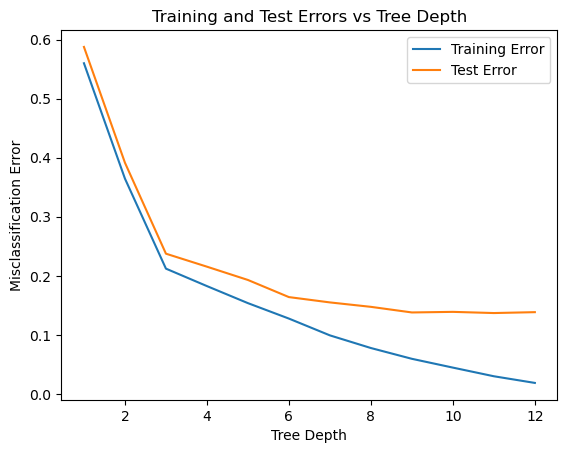

Minimum Test Error: 0.137
Corresponding Tree Depth: 11


In [55]:
# Plot the errors
plt.plot(depths, train_errors, label='Training Error')
plt.plot(depths, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Training and Test Errors vs Tree Depth')
plt.legend()
plt.savefig("1b.png")
plt.show()

# Find the minimum test error and its corresponding depth
min_test_error = min(test_errors)
min_depth = depths[test_errors.index(min_test_error)]

# Report results
print(f"Minimum Test Error: {min_test_error}")
print(f"Corresponding Tree Depth: {min_depth}")

